In [95]:
import math
import pandas_datareader as web 
import numpy as np 
import pandas as pd 
from sklearn. preprocessing import MinMaxScaler 
from keras. models import Sequential 
from keras. layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [98]:
import yfinance as yf

# start_date = '2013-01-01'
# end_date = '2023-12-08'

start_date = '2020-01-01'
end_date = '2023-12-10'
symbol = 'NFLX'

df = yf.download(symbol, start=start_date, end=end_date)
print(df.to_csv('apple.csv'))


[*********************100%%**********************]  1 of 1 completed
None


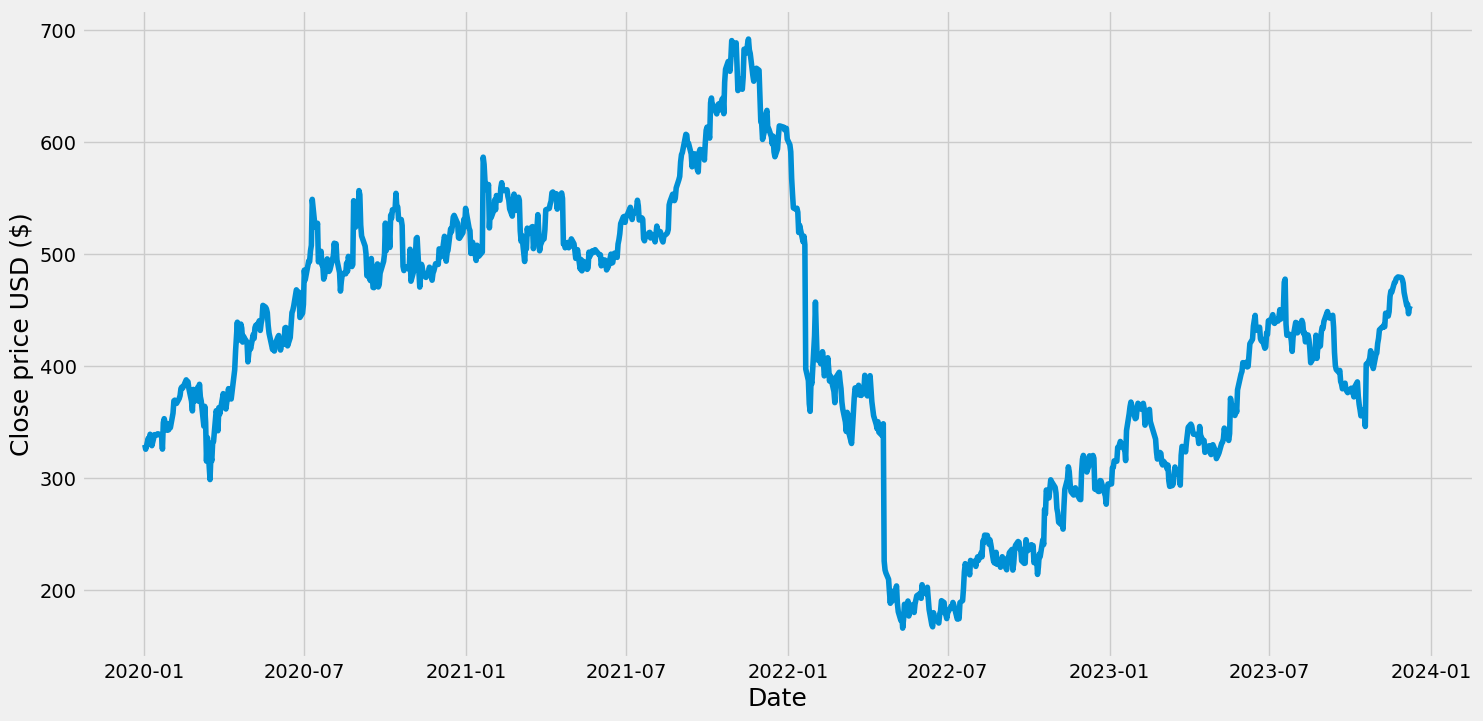

In [79]:
#closing price history
plt.figure(figsize = (16,8))
plt.title = ('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close price USD ($)',fontsize = 18)
plt.show()

In [80]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)

In [81]:
training_data_len

794

In [82]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [83]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.31112465, 0.30368156, 0.32258431, 0.31291404, 0.32911371,
       0.32226073, 0.30967789, 0.32846649, 0.32802864, 0.32875202,
       0.32789537, 0.32989419, 0.32692452, 0.30387193, 0.34879694,
       0.35557376, 0.33600473, 0.34674102, 0.33653774, 0.34525621,
       0.34021168, 0.36478718, 0.38574585, 0.38700224, 0.38182444,
       0.38148175, 0.38966727, 0.3946547 , 0.40668547, 0.40933145,
       0.40742785, 0.42147643, 0.41844971, 0.41808803, 0.40679968,
       0.38515574, 0.3687657 , 0.40521966, 0.39088554, 0.3857839 ,
       0.40866517, 0.38528895, 0.41388108, 0.39292241, 0.38566969,
       0.34287671, 0.37645627, 0.34940611, 0.28340821, 0.323479  ,
       0.2521701 , 0.29197442, 0.28382701, 0.31535065, 0.3168735 ,
       0.36910834, 0.36349275, 0.33507199, 0.37428613, 0.363112  ])]
[0.38945784185908816]



In [84]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [85]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(734, 60, 1)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build a more complex LSTM model
model = Sequential()

model.add(Conv1D(filters=128, kernel_size=2, strides=1, padding='valid', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2, strides=2))

model.add(Conv1D(filters=64, kernel_size=2, strides=1, padding='valid'))
model.add(MaxPooling1D(pool_size=1, strides=2))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dense(trainY.shape[2], activation='relu'))

model.compile(optimizer='adam', loss='mse')




2023-12-11 16:19:24.798863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-11 16:19:24.800801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-11 16:19:24.801962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [87]:
model.fit(x_train,y_train, batch_size = 1, epochs=2)

Epoch 1/2


2023-12-11 16:19:25.509412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-11 16:19:25.511220: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-11 16:19:25.513107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

734/734 [==============================] - 37s 45ms/step - loss: 0.0159
Epoch 2/2
734/734 [==============================] - 37s 51ms/step - loss: 0.0081


In [88]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [89]:
x_test = np.array(x_test)

In [90]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [91]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2023-12-11 16:20:39.547197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-11 16:20:39.549374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-11 16:20:39.550637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 1s 56ms/step


In [92]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.684981991546323

In [93]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/tmp/ipykernel_4176749/2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


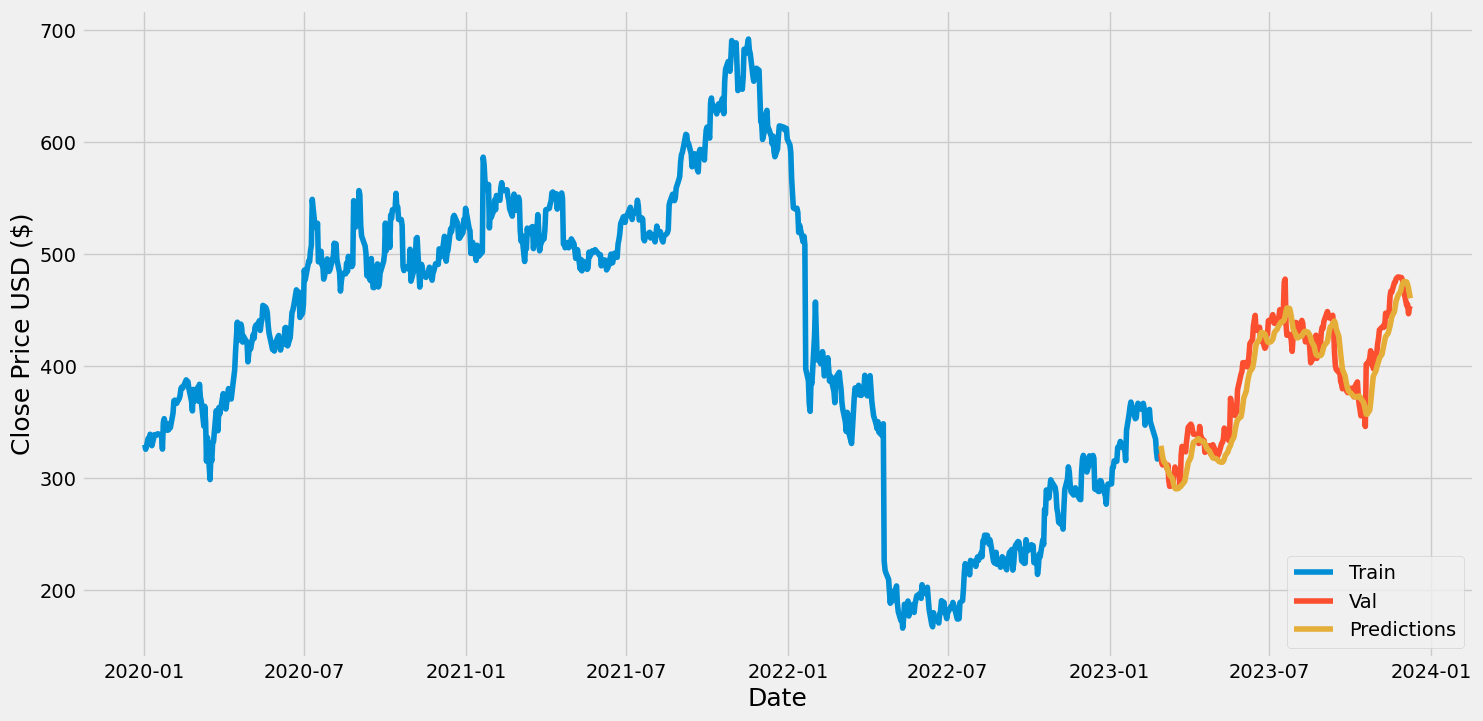

In [94]:
plt.figure(figsize=(16, 8))
#plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
plt.t